In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df = pandas.read_csv('http://pogo.software/me4ml/slip_data.csv')

f1 = np.array(df['f1'][:])
f1ang = np.array(df['f1ang'][:])
f2 = np.array(df['f2'][:])
f2ang = np.array(df['f2ang'][:])
m = np.array(df['m'][:])
slips = np.array(df['slips'][:])

## combine these parameters into a single variable
X = np.column_stack((f2, f2ang))
y = np.array(df['slips'][:]) # classes

[0.         0.         0.         ... 6.28318531 6.28318531 6.28318531]


Text(0, 0.5, 'Force 2 Angle')

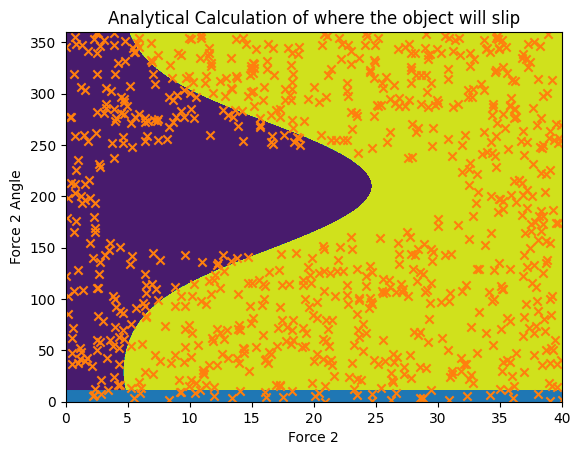

In [4]:
def gen_sample_grid(npt=200, x_limit = 4, y_limit = 4):
  x1line = np.linspace(0, x_limit, npt)
  x2line = np.linspace(0, y_limit, npt)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npt*npt]).T
  return Xgrid, x1line, x2line

npt=1000
Xgrid, x1line, x2line = gen_sample_grid(npt, 40, 360)
### in this case x1line is the varying force and x2line is the varying angle

# holding f1 and f1 ang constant
f1 = 10
f1ang = np.radians(30)

# change the anglge into radians
f2ang = np.radians(Xgrid[:,1])
print(f2ang)
f2 = Xgrid[:,0]

# friction forces
F_x = f1*np.sin(f1ang)+f2*np.sin(f2ang)
F_y = f1*np.cos(f1ang)+f2*np.cos(f2ang)
F_t = np.sqrt(F_x**2+F_y**2)

# moving forces
g,m,u = 9.81,3,0.5
F_m = u*m*g

# Create a array indicating where F_t > F_m
slip = np.zeros(len(F_t))
for i in range(0,len(F_t)):
  if F_t[i] > F_m:
    slip[i] = 1

F_t = np.reshape(slip,[npt,npt])
plt.contourf(x1line,x2line,F_t)
plt.scatter(X[y==0,0],X[y==0,1],label='Class 0',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],label='Class 1',marker='x')
plt.title('Analytical Calculation of where the object will slip')
plt.xlabel('Force 2')
plt.ylabel('Force 2 Angle')